Importing data sets

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier #Modelling prediction to be use
from sklearn.model_selection import train_test_split #splitting dataset into test and train datasets
from sklearn.metrics import accuracy_score #To measure the accuracy of the model
import joblib #saving predictve model into file
from sklearn import tree

df = pd.read_csv("C:\\Users\\oliva\\Desktop\\Python_Tutorials\\python_ml-master\\music.csv")
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [67]:
#Split data set (dependent and independent variable)
x = df.drop(columns=["genre"]) #predictor - 2 independent variables - age and gender
y = df["genre"] #response

#Modelling
model = DecisionTreeClassifier()

#Traininig the model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) #means that 20% of the dataset is use for testing
model.fit(x_train,y_train)

#Predicting by adding additional array or dataset to be predicted
#Example - prediction = model.predict([[21,1],[19,0]]): adding additonal array([age,gender]) to predict that is not included on the existing datasets
prediction = model.predict(x_test)
prediction

#accuracy_score -is the fraction of samples predicted correctly (actual/predicted)
score = accuracy_score(y_test,prediction) 
score

#saving predictive model 
joblib.dump(model,"music recommender.joblib") 

['music recommender.joblib']

Loading saved joblib file to predict sample dataset

In [61]:
joblib.load("music recommender.joblib")
prediction = model.predict([[21,1],[19,0]])
prediction

array(['HipHop', 'Dance'], dtype=object)

Visualization importing into dot file - runs on VS code

In [64]:
tree.export_graphviz(model,out_file="music recommender.dot",
                     feature_names=["age","gender"],
                     class_names=sorted(y.unique()),
                     label="all",rounded=True,
                    filled=True)

[Text(387.5, 528.5, 'age <= 30.0\ngini = 0.786\nsamples = 14\nvalue = [2, 4, 3, 3, 2]\nclass = Classical'),
 Text(310.0, 377.5, 'gender <= 0.5\ngini = 0.74\nsamples = 10\nvalue = [2, 0, 3, 3, 2]\nclass = Dance'),
 Text(155.0, 226.5, 'age <= 25.5\ngini = 0.48\nsamples = 5\nvalue = [2, 0, 3, 0, 0]\nclass = Dance'),
 Text(77.5, 75.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]\nclass = Dance'),
 Text(232.5, 75.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0]\nclass = Acoustic'),
 Text(465.0, 226.5, 'age <= 25.5\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 0, 3, 2]\nclass = HipHop'),
 Text(387.5, 75.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0]\nclass = HipHop'),
 Text(542.5, 75.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2]\nclass = Jazz'),
 Text(465.0, 377.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0, 0]\nclass = Classical')]

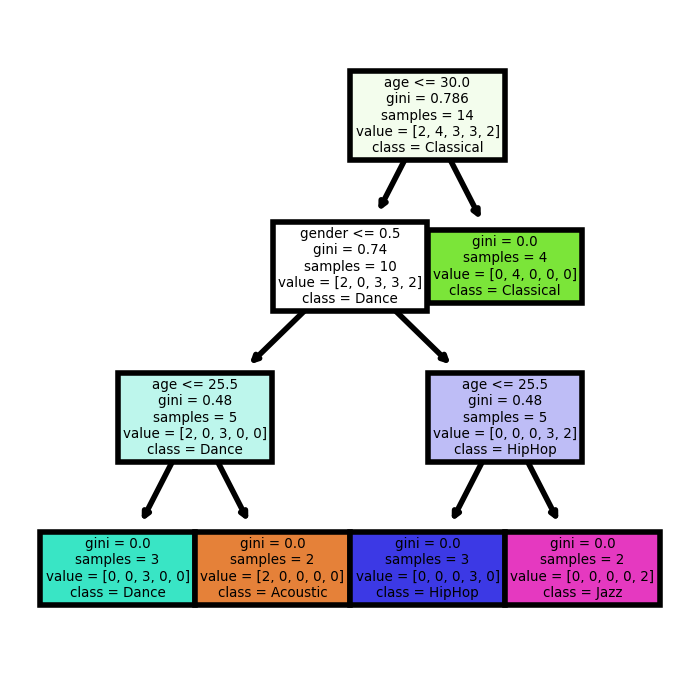

In [84]:
#Decision Tree Visualization
plt.subplots(nrows =1,ncols =1,figsize = (2,2), dpi=400)

tree.plot_tree(model,feature_names=["age","gender"], 
               class_names=sorted(y.unique()),
               label = "all",
               filled = True)